In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('D:\sravan\data\Heart-Attack-Prediction\heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<Axes: >

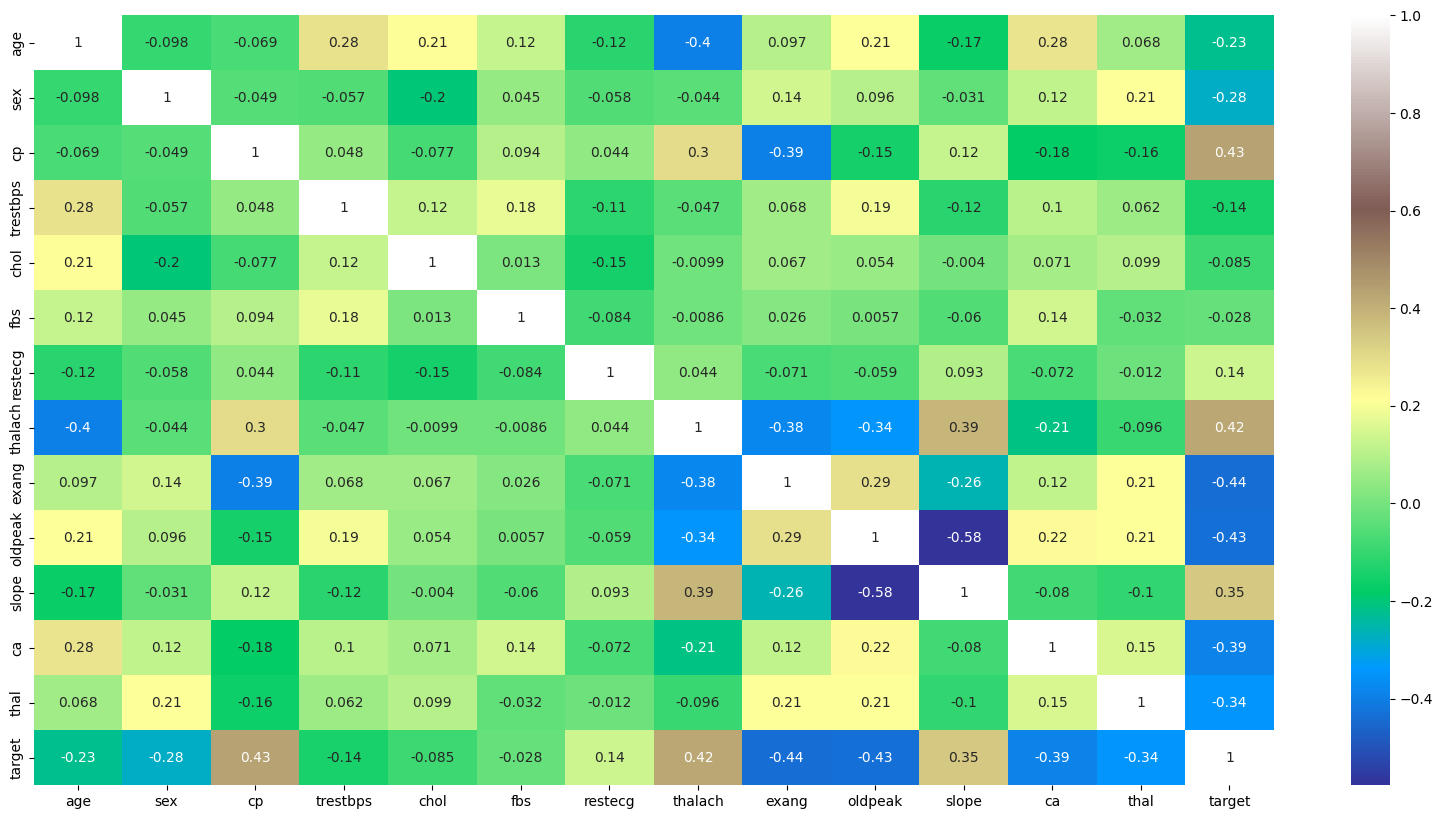

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

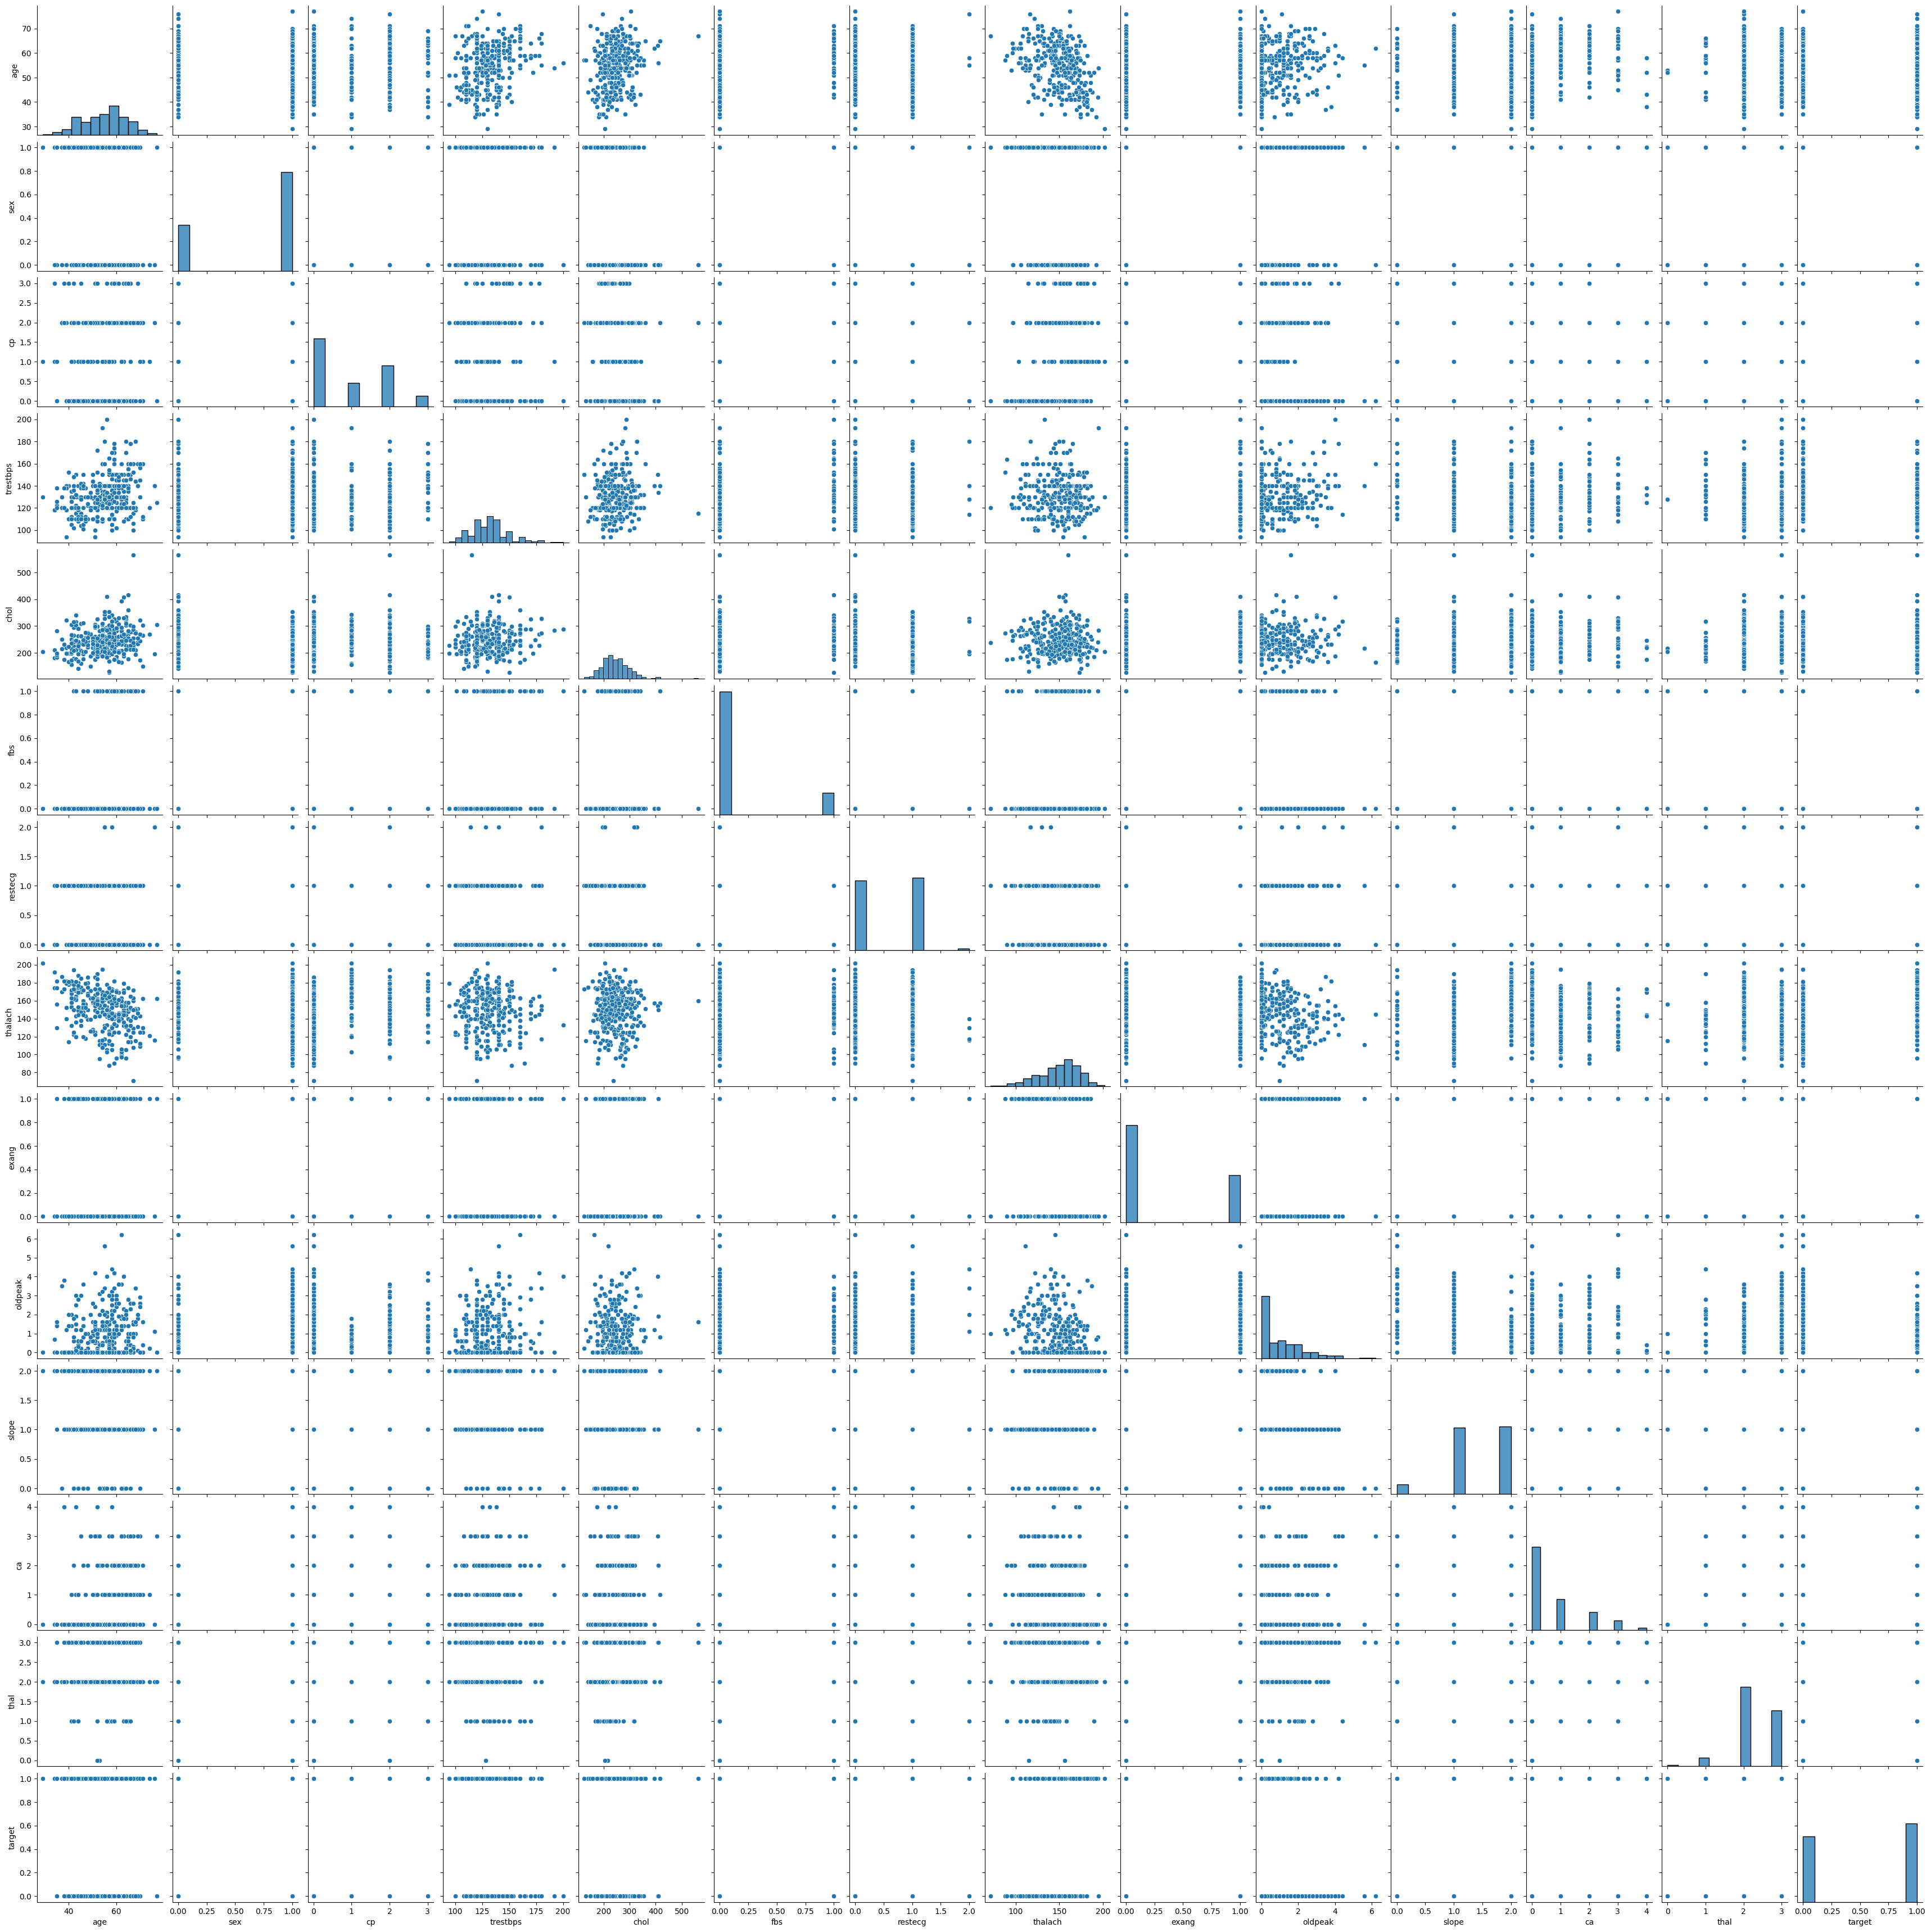

In [9]:
sns.pairplot(data=df)

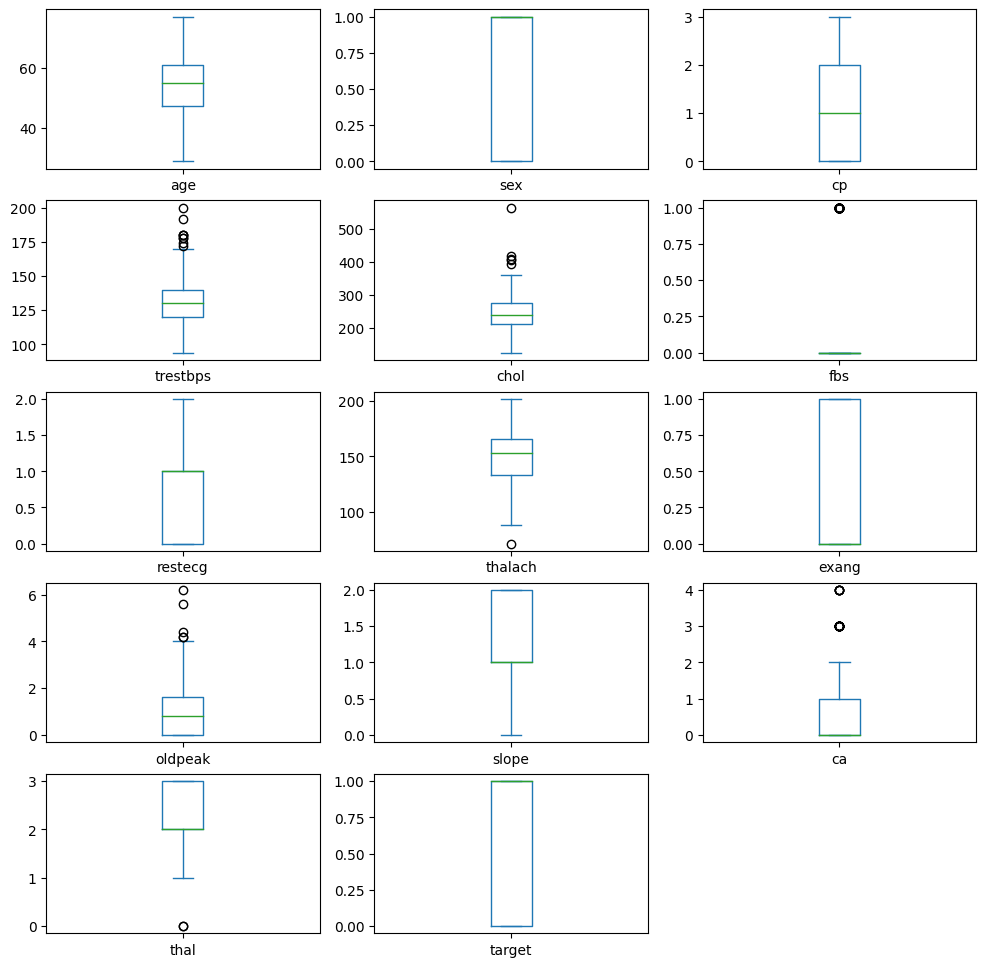

In [11]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

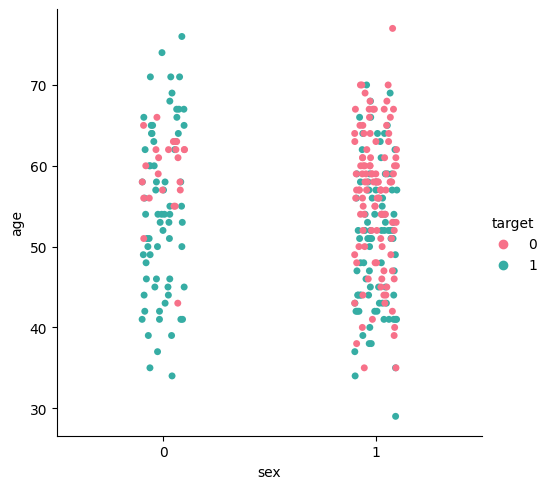

In [12]:
sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

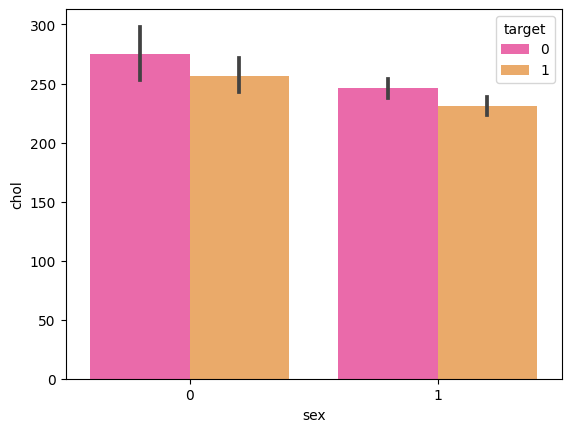

In [13]:
sns.barplot(data=df,x='sex',y='chol',hue='target',palette='spring')

In [14]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

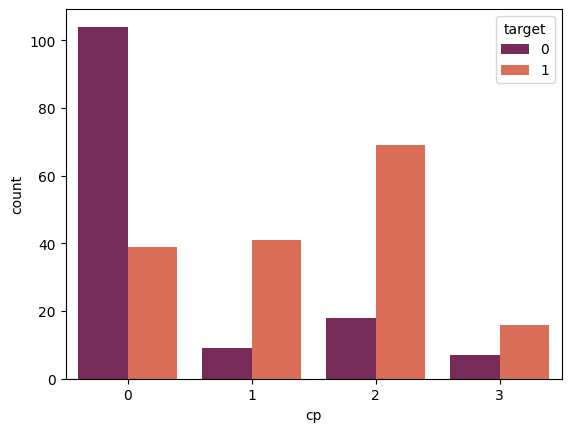

In [16]:
sns.countplot(x='cp',hue='target',data=df,palette='rocket')

In [17]:
gen=pd.crosstab(df['sex'],df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<Axes: xlabel='sex'>

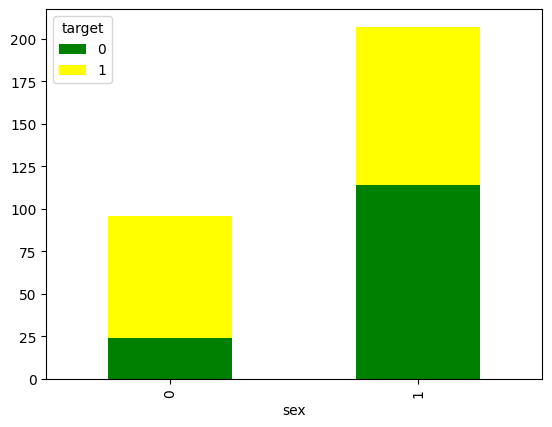

In [18]:
gen.plot(kind='bar',stacked=True,color=['green','yellow'],grid=False)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [24]:
X=df.drop(['target'],axis=1)
y=df['target']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [27]:
print('X_train-',X_train.size)
print('X_test-',X_test.size)
print('y_train-',y_train.size)
print('y_test-',y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<Axes: >

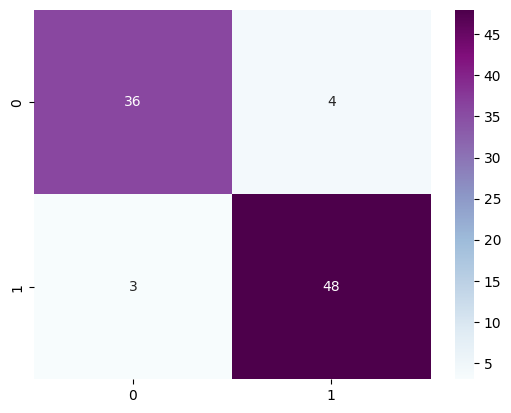

In [31]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [32]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.9230769230769231


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model2=knn.fit(X_train,y_train)
prediction2=model2.predict(X_test)



In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction2)
cm

array([[32,  8],
       [ 7, 44]], dtype=int64)

<Axes: >

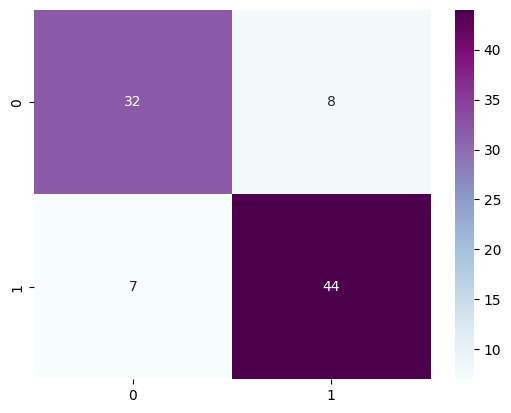

In [45]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [46]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.8351648351648352


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [49]:
from sklearn import svm
svm=svm.SVC()
model3=svm.fit(X_train,y_train)
prediction3=model3.predict(X_test)



In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction3)
cm

array([[33,  7],
       [ 2, 49]], dtype=int64)

<Axes: >

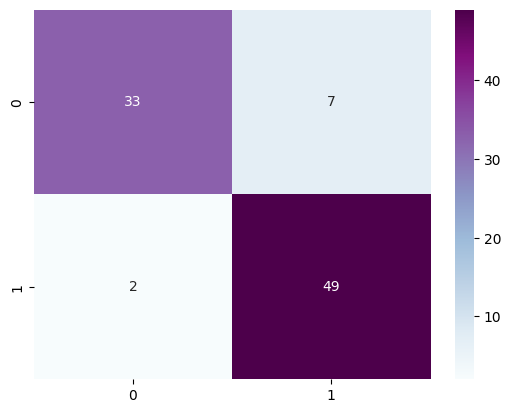

In [52]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [53]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.9010989010989011


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))


              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



In [81]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier=DecisionTreeClassifier()
model4=DecisionTreeClassifier.fit(X_train,y_train)
prediction4=model4.predict(X_test)



In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction4)
cm

array([[29, 11],
       [12, 39]], dtype=int64)

<Axes: >

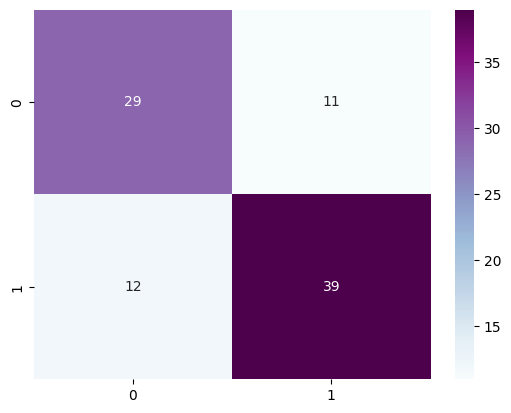

In [83]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [84]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.7472527472527473


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction4))


              precision    recall  f1-score   support

           0       0.71      0.72      0.72        40
           1       0.78      0.76      0.77        51

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [76]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()
model5=RandomForestClassifier.fit(X_train,y_train)
prediction5=model5.predict(X_test)



In [77]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction5)
cm

array([[35,  5],
       [ 5, 46]], dtype=int64)

<Axes: >

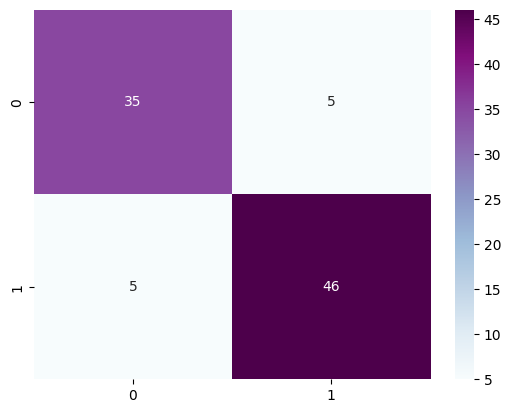

In [78]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [79]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.8901098901098901


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))


              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



In [71]:
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB()
model6=GaussianNB.fit(X_train,y_train)
prediction6=model6.predict(X_test)





In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction6)
cm

array([[35,  5],
       [ 6, 45]], dtype=int64)

<Axes: >

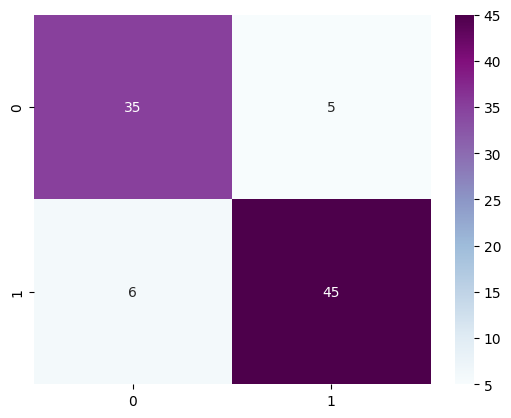

In [73]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [74]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))


testing accuracy: 0.8791208791208791


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction6))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

